In [32]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

In [34]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/sonar.all-data.csv')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0.0200  207 non-null    float64
 1   0.0371  207 non-null    float64
 2   0.0428  207 non-null    float64
 3   0.0207  207 non-null    float64
 4   0.0954  207 non-null    float64
 5   0.0986  207 non-null    float64
 6   0.1539  207 non-null    float64
 7   0.1601  207 non-null    float64
 8   0.3109  207 non-null    float64
 9   0.2111  207 non-null    float64
 10  0.1609  207 non-null    float64
 11  0.1582  207 non-null    float64
 12  0.2238  207 non-null    float64
 13  0.0645  207 non-null    float64
 14  0.0660  207 non-null    float64
 15  0.2273  207 non-null    float64
 16  0.3100  207 non-null    float64
 17  0.2999  207 non-null    float64
 18  0.5078  207 non-null    float64
 19  0.4797  207 non-null    float64
 20  0.5783  207 non-null    float64
 21  0.5071  207 non-null    float64
 22  0.

In [36]:
df.columns

Index(['0.0200', '0.0371', '0.0428', '0.0207', '0.0954', '0.0986', '0.1539',
       '0.1601', '0.3109', '0.2111', '0.1609', '0.1582', '0.2238', '0.0645',
       '0.0660', '0.2273', '0.3100', '0.2999', '0.5078', '0.4797', '0.5783',
       '0.5071', '0.4328', '0.5550', '0.6711', '0.6415', '0.7104', '0.8080',
       '0.6791', '0.3857', '0.1307', '0.2604', '0.5121', '0.7547', '0.8537',
       '0.8507', '0.6692', '0.6097', '0.4943', '0.2744', '0.0510', '0.2834',
       '0.2825', '0.4256', '0.2641', '0.1386', '0.1051', '0.1343', '0.0383',
       '0.0324', '0.0232', '0.0027', '0.0065', '0.0159', '0.0072', '0.0167',
       '0.0180', '0.0084', '0.0090', '0.0032', 'R'],
      dtype='object')

In [37]:
df.R.value_counts()

M    111
R     96
Name: R, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
le = LabelEncoder()
df['R'] = le.fit_transform(df['R'])

In [40]:
X = df.drop('R', axis=1)
Y = df.R

In [41]:
#Splitting the dataset into the training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0, shuffle=True)

In [42]:
#Putting the values in the same scale
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [43]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2) 
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
expained_variance = pca.explained_variance_ratio_

In [44]:
X.shape

(207, 60)

In [45]:
X_train.shape

(165, 2)

In [46]:
X_test.shape

(42, 2)

Text(0, 0.5, 'Second principle component')

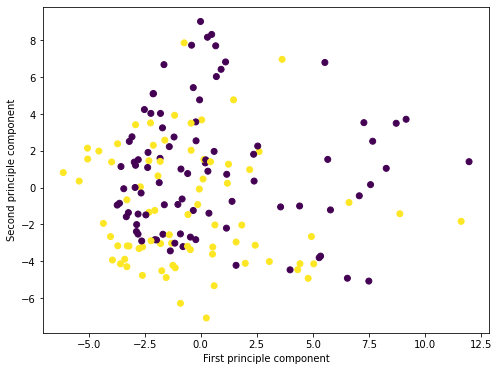

In [47]:
plt.figure(figsize=(8,6))
plt.scatter(X_train[:,0],X_train[:,1],c=Y_train)
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [48]:
import tensorflow as tf

In [49]:
print(tf.__version__)

2.3.0


In [50]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [51]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 15875284943802420475, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7029443049382869587
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 9842566431647991174
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15434046495617439996
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [52]:
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.activations import sigmoid, relu
from keras import regularizers

In [53]:
def create_model(layers, activation):
     model = Sequential() 
     for i, nodes in enumerate(layers):
       if(i==0):
          model.add(Dense(nodes, input_dim=X_train.shape[1]))
          #model.add(BatchNormalization())
          model.add(Activation(activation=activation))
          model.add(Dropout(0.3))
       else:   
          model.add(Dense(nodes ))
          #model.add(BatchNormalization())
          model.add(Activation(activation=activation))
          model.add(Dropout(0.3))

     model.add(Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'))     
     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
     return model

In [54]:
model = KerasClassifier(build_fn=create_model)

In [55]:
for i , nodes in enumerate([40, 20]):
    print(i, nodes)

0 40
1 20


In [56]:
# Create hyperparameter space
layers = [(20), (40, 20), (45, 30, 15)]
activations = ['sigmoid', 'relu']
epochs = [5, 10 , 30]
batches = [128, 256]

# Create hyperparameter options
hyperparameters = dict(layers=layers, activation=activations, epochs=epochs, batch_size=batches)

In [57]:
# Create grid search
grid = GridSearchCV(estimator=model, cv=5, param_grid=hyperparameters)

# Fit grid search
grid_result = grid.fit(X_train, Y_train)

Epoch 1/5


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
TypeError: 'int' object is not iterable

  FitFailedWarning)


2/2 [==============================] - 0s 3ms/step - loss: 0.7302 - accuracy: 0.4924
Epoch 2/5
2/2 [==============================] - 0s 3ms/step - loss: 0.7114 - accuracy: 0.4773
Epoch 3/5
2/2 [==============================] - 0s 3ms/step - loss: 0.6762 - accuracy: 0.5455
Epoch 4/5
2/2 [==============================] - 0s 3ms/step - loss: 0.7235 - accuracy: 0.4621
Epoch 5/5
1/1 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.4242
Epoch 1/5
2/2 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.5303
Epoch 2/5
2/2 [==============================] - 0s 2ms/step - loss: 0.7175 - accuracy: 0.5076
Epoch 3/5
2/2 [==============================] - 0s 3ms/step - loss: 0.7377 - accuracy: 0.4545
Epoch 4/5
2/2 [==============================] - 0s 3ms/step - loss: 0.7170 - accuracy: 0.4924
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 0.6756 - accuracy: 0.6364
Epoch 1/5
2/2 [==============================] - 0s 3ms/step

In [58]:
# View hyperparameters of best neural network
print(grid_result.best_score_, grid_result.best_params_)

0.6242424368858337 {'activation': 'relu', 'batch_size': 128, 'epochs': 30, 'layers': (40, 20)}


In [59]:
predictions = grid.predict(X_test)

In [60]:
y_pred = predictions > 0.5

In [61]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [62]:
print(accuracy_score(y_pred, Y_test))
print(confusion_matrix(y_pred, Y_test))
print(classification_report(y_pred, Y_test))

0.5952380952380952
[[14  9]
 [ 8 11]]
              precision    recall  f1-score   support

       False       0.64      0.61      0.62        23
        True       0.55      0.58      0.56        19

    accuracy                           0.60        42
   macro avg       0.59      0.59      0.59        42
weighted avg       0.60      0.60      0.60        42

